In [44]:
%matplotlib inline


# Plot the decision surface of decision trees trained on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


First load the copy of the Iris dataset shipped with scikit-learn:



Display the decision functions of trees trained on all pairs of features.



In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

ModuleNotFoundError: No module named 'sklearn'

Display the structure of a single decision tree trained on all the features
together.



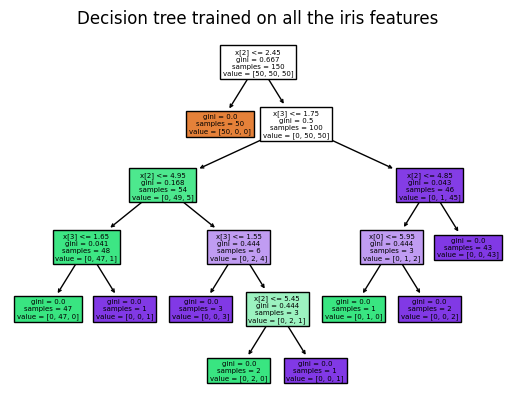

In [47]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [48]:
from sklearn.tree import export_text

In [49]:
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [50]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("fn predict({} :u32) -> u32 {{".format(": u32, ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node].replace(" ", "_")[:-5]
            threshold = tree_.threshold[node]
            print("{}if {} <= {} {{".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{} }}".format(indent))
            print("{}else if {{".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
            print("{} }}".format(indent))
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node][0])))

    recurse(0, 1)
    print("}")

In [51]:
c = tree_to_code(clf, feature_names=iris['feature_names']);
print(c)

fn predict(sepal_length: u32, sepal_width: u32, petal_length: u32, petal_width :u32) -> u32 {
    if petal_length <= 2.45 {
        return 0
     }
    else if {
        if petal_width <= 1.75 {
            if petal_length <= 4.95 {
                if petal_width <= 1.65 {
                    return 1
                 }
                else if {
                    return 2
                 }
             }
            else if {
                if petal_width <= 1.55 {
                    return 2
                 }
                else if {
                    if petal_length <= 5.45 {
                        return 1
                     }
                    else if {
                        return 2
                     }
                 }
             }
         }
        else if {
            if petal_length <= 4.85 {
                if sepal_length <= 5.95 {
                    return 1
                 }
                else if {
                    return 2
                 }